# Final Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from datetime import timedelta
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Summary Stats

In [2]:
am=pd.read_csv(r"angels_market.csv")

In [3]:
am.head()

,vendorID,theme,homeState,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
0,1,Hot Chocolate/Warm Treats,Maine,3,9,57.291961,118,0,217.93
1,2,Local Artists,Vermont,1,2,39.404898,105,1,209.51
2,3,Fortune Teller,New Hampshire,5,4,47.175958,94,0,200.68
3,4,Fried Dough and Pizza,Maine,8,0,58.192568,118,0,251.40
4,5,craft beer,New Hampshire,7,6,56.657908,102,0,168.76


In [4]:
am.isnull().sum()

vendorID            0
theme               0
homeState           0
carnivals           0
complaints          0
est_energy          0
est_hourly_vol      0
LL_passholder       0
est_hourly_gross    0
dtype: int64

In [5]:
am.describe()

,vendorID,carnivals,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,345.375714,5.135714,5.237143,47.501858,110.152857,0.204286,216.543357
std,204.173508,2.202258,4.914525,14.172002,15.903799,0.403467,41.561560
min,1.000000,0.000000,0.000000,3.069903,1.000000,0.000000,4.000000
25%,167.750000,4.000000,0.000000,39.596198,103.000000,0.000000,193.810000
50%,346.500000,5.000000,4.500000,47.955097,110.500000,0.000000,217.490000
75%,521.250000,7.000000,9.000000,57.336190,119.000000,0.000000,242.502500
max,700.000000,13.000000,20.000000,91.567936,147.000000,1.000000,322.570000


In [6]:
am.groupby('theme')['est_hourly_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
theme,,,,,,,,
3,1.0,6.000000,NaN,6.00,6.0000,6.000,6.0000,6.00
4,1.0,8.000000,NaN,8.00,8.0000,8.000,8.0000,8.00
5,2.0,6.500000,2.121320,5.00,5.7500,6.500,7.2500,8.00
7,2.0,7.500000,0.707107,7.00,7.2500,7.500,7.7500,8.00
8,1.0,7.000000,NaN,7.00,7.0000,7.000,7.0000,7.00
9,1.0,4.000000,NaN,4.00,4.0000,4.000,4.0000,4.00
Canadian Snacks,74.0,221.436892,32.846742,124.75,201.3850,219.380,241.6525,281.79
DIY Ice Sculpture,19.0,222.981053,30.426289,146.03,203.4200,235.810,245.6150,263.95
Fortune Teller,9.0,207.072222,24.840857,175.46,196.1000,200.680,211.0900,263.86


first observation was that the dataset contains 6 themes, that are not labelled correctly. This can be due to a data entry error, or vendors with extremely unique themes that did not show up due to scheduling conflicts or insufficient resources to set up their stalls. The latter is more liekly the case, becuase the hourly gross and energy consumption associated with these themes are almost negligible in comparision to the rest of the themes.
Furthermore, we see that Local Artists generate the highest average hourly income among all other vendor themes.

In [7]:
am['complaints'].value_counts()

complaints
0     192
5      46
3      46
9      43
6      43
7      41
8      39
1      39
4      38
2      35
11     26
10     23
12     22
13     18
14     15
17     12
15      9
16      6
20      3
19      2
18      2
Name: count, dtype: int64

192/700=27.42% of the time, customers have had no complaints filed against the vendors in previous carnivals. These would be the safest options for
Lobsterland to select for their angels market. However, a glaring limitation with this dataset is the severity of the complaints. If regular complaints can be
different from severe complaints, it would be easier for Lobsterland management to select vendors with no serious complaints filed in their past visits.

In [8]:
am.columns

Index(['vendorID', 'theme', 'homeState', 'carnivals', 'complaints',
       'est_energy', 'est_hourly_vol', 'LL_passholder', 'est_hourly_gross'],
      dtype='object')

In [9]:
am[['carnivals', 'complaints','est_energy', 'est_hourly_vol', 'LL_passholder', 'est_hourly_gross']].groupby('carnivals').mean()

,complaints,est_energy,est_hourly_vol,LL_passholder,est_hourly_gross
carnivals,,,,,
0,0.000000,53.063056,121.666667,0.333333,262.243333
1,6.103448,49.618059,111.137931,0.206897,211.392759
2,4.977273,49.382926,112.636364,0.250000,219.491364
3,5.451220,48.877076,110.426829,0.134146,223.403293
4,5.065574,46.268356,111.581967,0.213115,218.328033
5,5.210526,46.254998,108.248120,0.225564,214.606541
6,5.859813,48.024971,109.392523,0.196262,213.119720
7,5.180723,45.633131,110.373494,0.180723,213.287831
8,4.381818,47.858361,110.054545,0.236364,220.763273


By looking at the different number of carnivals the vendors have appeared in, we can see that the average estimated hourly volume of customers is the highest
for a vendor with 0 past carnival apperances, amounting to 121 per hour. Visitors at Lobsterland seem to enjoy exploring new vendors they have not seen at
other parks before. The repetitiveness seems to bore customers, as we see how the hourly volume decreases with number of carnival visits.

In [10]:
am.pivot_table('est_energy', index='carnivals', columns='homeState', margins=True)

homeState,2,4,5,6,7,Connecticut,Maine,Massachusetts,New Hampshire,Ontario,Quebec,Vermont,All
carnivals,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,67.347419,NaN,NaN,24.494331,NaN,NaN,53.063056
1,NaN,NaN,NaN,NaN,NaN,70.402830,51.466190,15.123110,51.413808,NaN,53.613292,41.397680,49.618059
2,NaN,NaN,NaN,NaN,NaN,39.321509,49.078409,43.918733,55.899673,38.874815,59.411244,50.979621,49.382926
3,NaN,NaN,NaN,NaN,NaN,49.074666,50.051878,49.420920,43.738546,56.671071,48.582257,42.437416,48.877076
4,NaN,NaN,NaN,NaN,NaN,45.274890,45.303136,52.379832,48.519645,54.678973,40.910528,56.145917,46.268356
5,8.0,9.0,NaN,NaN,5.0,48.751408,47.293545,45.295418,45.015961,NaN,44.111371,50.188556,46.254998
6,NaN,NaN,8.000000,NaN,NaN,53.089609,47.941747,37.817052,46.709815,50.529512,51.100199,55.107976,48.024971
7,NaN,NaN,NaN,NaN,NaN,46.444979,44.287974,39.836256,47.052452,56.012285,54.580078,37.524340,45.633131
8,NaN,NaN,4.000000,NaN,5.0,60.632120,48.504658,44.061156,44.141029,19.427950,42.512826,71.248596,47.858361


After creating a pivot table to show the energy consumptions among different homestates, we see that vendors from Vermont have the highest average energy
consumption, 51.41% compared to other homestates, whereas vendors from Massachusetts consume the least energy for operating their stalls, at 44.17%.
Lobsterland should consider hiring more vendors from MA to save up on utility costs.

# Segmentation and Targeting

In [11]:
mf = pd.read_csv(r'maine_families.csv')

In [12]:
mf.head()

,householdID,total_ppl,own_rent,square_foot,household_income,number_pets,region,entertainment_spend_est,travel_spend_est,LL_passholder
0,1,1.0,own,3309,82050.03,1,Aroostook,3189.11,2028.559211,Yes
1,2,1.0,own,3814,83077.81,2,Midcoast,4175.35,4713.280000,Yes
2,3,2.0,rent,2592,91401.41,2,Downeast_Acadia,1814.98,3479.070000,No
3,4,1.0,own,2628,73048.55,1,Greater Portland,1945.14,3842.420000,No
4,5,1.0,rent,2442,89145.36,2,Kennebec Valley,4410.86,1913.280000,Yes


## Segmentation


### Dealing with NANs with mean values.

In [13]:
mf.isna().sum()

householdID                 0
total_ppl                  75
own_rent                    0
square_foot                 0
household_income            0
number_pets                 0
region                      0
entertainment_spend_est     0
travel_spend_est            0
LL_passholder               0
dtype: int64

In [14]:
mean_value=mf['total_ppl'].mean()
mf['total_ppl'].fillna(value=mean_value, inplace=True)

In [15]:
mf.isna().sum()

householdID                0
total_ppl                  0
own_rent                   0
square_foot                0
household_income           0
number_pets                0
region                     0
entertainment_spend_est    0
travel_spend_est           0
LL_passholder              0
dtype: int64

### Keep numeric variables only.


In [16]:
numeric = mf

In [17]:
numeric = numeric.drop('householdID', axis=1)
numeric = numeric.drop('own_rent', axis=1)
numeric = numeric.drop('region', axis=1)
numeric = numeric.drop('LL_passholder', axis=1)

In [18]:
numeric.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
0,1.0,3309,82050.03,1,3189.11,2028.559211
1,1.0,3814,83077.81,2,4175.35,4713.280000
2,2.0,2592,91401.41,2,1814.98,3479.070000
3,1.0,2628,73048.55,1,1945.14,3842.420000
4,1.0,2442,89145.36,2,4410.86,1913.280000


### Data scaling


In [19]:
scaling = numeric

In [20]:
scaling['total_ppl'] = stats.zscore(scaling.total_ppl)
scaling['square_foot'] = stats.zscore(scaling.square_foot)
scaling['household_income'] = stats.zscore(scaling.household_income)
scaling['number_pets'] = stats.zscore(scaling.number_pets)
scaling['entertainment_spend_est'] = stats.zscore(scaling.entertainment_spend_est)
scaling['travel_spend_est'] = stats.zscore(scaling.travel_spend_est)

In [21]:
scaling.head()

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
0,-0.714042,0.232960,-0.101357,-0.644446,-0.213953,-1.820797
1,-0.714042,0.851909,-0.061449,0.621159,0.588903,1.134566
2,0.515857,-0.645826,0.261750,0.621159,-1.332575,-0.224063
3,-0.714042,-0.601703,-0.450877,-0.644446,-1.226617,0.175916
4,-0.714042,-0.829672,0.174149,0.621159,0.780622,-1.947698


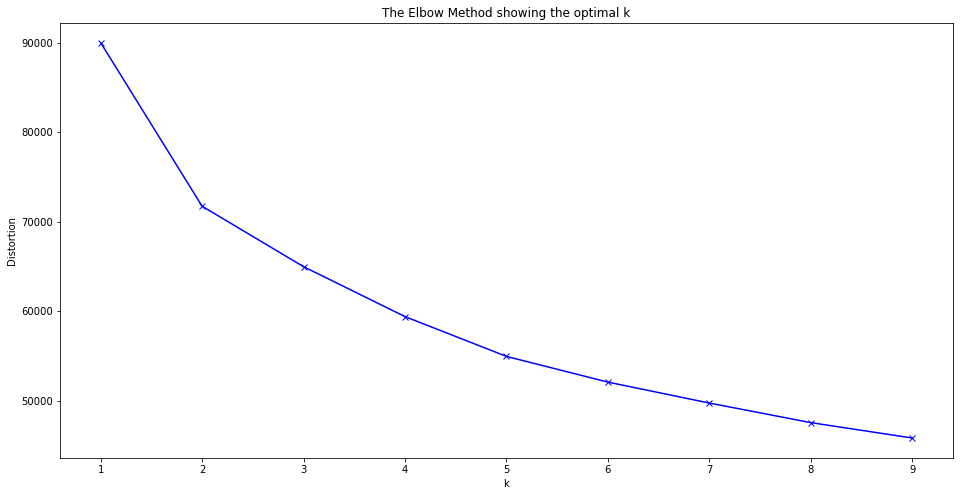

In [22]:
distortions = []
K = range(1,10)
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(scaling)
 distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

although the elbow chart shows that 2 might be the best k value for clustering, but after I tried, 4 will be better.

In [23]:
kmeanModel = KMeans(n_clusters = 4, random_state = 123)
kmeanModel.fit(scaling)
scaling['Cluster']=kmeanModel.predict(numeric)

In [24]:
mf['Cluster'] = scaling['Cluster']

In [25]:
numeric['Cluster'].value_counts()

Cluster
0    4107
2    4001
3    3715
1    3177
Name: count, dtype: int64

In [26]:
mf.groupby('Cluster')[['total_ppl',
                     'square_foot',
                    'household_income',
                    'number_pets',
                    'entertainment_spend_est',
                    'travel_spend_est']].mean() 

,total_ppl,square_foot,household_income,number_pets,entertainment_spend_est,travel_spend_est
Cluster,,,,,,
0,1.836754,3044.093255,70318.073190,2.230338,2818.574716,3175.222050
1,2.026723,3304.224111,108964.347913,1.480327,4726.343009,4398.698313
2,1.807080,3019.701325,69843.729708,0.794801,2823.141722,3188.367318
3,0.671862,3150.065410,95688.971254,1.506057,3739.469335,4163.458019


<AxesSubplot:xlabel='Cluster', ylabel='total_ppl'>

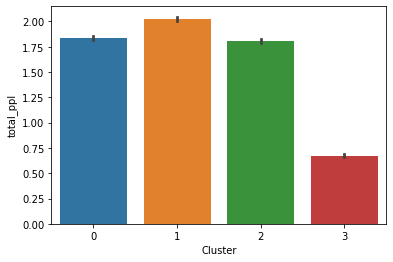

In [27]:
sns.barplot(x = 'Cluster', y = 'total_ppl', data = mf)

<AxesSubplot:xlabel='Cluster', ylabel='square_foot'>

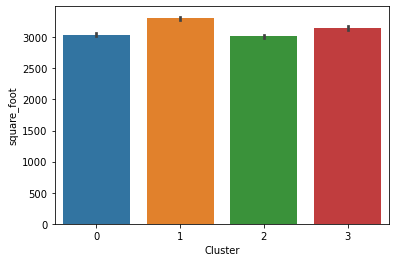

In [28]:
sns.barplot(x = 'Cluster', y = 'square_foot', data = mf)

<AxesSubplot:xlabel='Cluster', ylabel='household_income'>

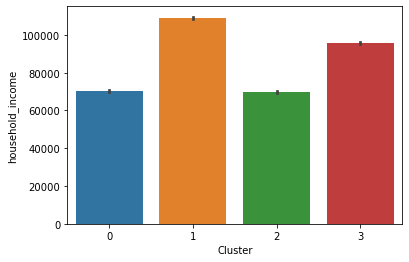

In [29]:
sns.barplot(x = 'Cluster', y = 'household_income', data = mf)

<AxesSubplot:xlabel='Cluster', ylabel='number_pets'>

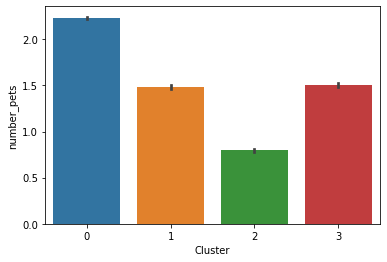

In [30]:
sns.barplot(x = 'Cluster', y = 'number_pets', data = mf)

<AxesSubplot:xlabel='Cluster', ylabel='entertainment_spend_est'>

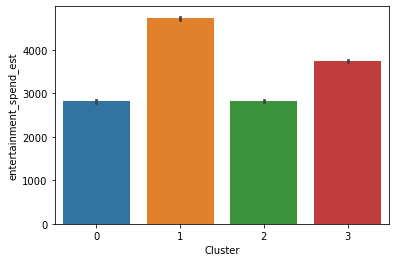

In [31]:
sns.barplot(x = 'Cluster', y = 'entertainment_spend_est', data = mf)

<AxesSubplot:xlabel='Cluster', ylabel='travel_spend_est'>

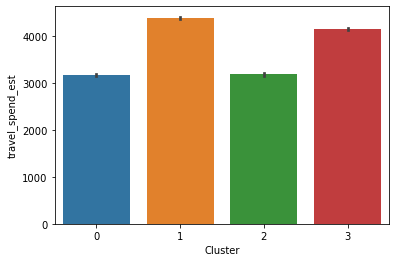

In [32]:
sns.barplot(x = 'Cluster', y = 'travel_spend_est', data = mf)

### Clustering
Cluster 0: Pet Lover

Cluster 0 is known to me as Pet Lover because they have the largest number of family pets of the four clusters. And they are very willing to invest in their pets,
willing to buy bigger homes and spend more on travel for their pets. Sometimes they even sacrifice their entertainment time for their pets.

Cluster 1: Big Family

I refer to Cluster 1 as a Big Family because they have the highest total household size, total household income and total spending in all areas, which means
they are willing to spend, and although they may not have the highest per capita spending, they are undoubtedly the largest customer when it comes to the
household as a unit.

Cluster 2: Low Class

Cluster 2 is what I would call Low Class. The household income and family home size show that this Cluster is the least financially capable of the four clusters.
They basically have no pet ties and will keep their spending as low as possible when they go out.

Cluster 3: Single Elite

I call Cluster 3 Single Elite because they are busy working, some don't even live at home. The size of the home shows their financial strength is strong, and
they have the highest per capita income, per capita entertainment spending and per capita travel spending of the four Clusters.


### Targeting

Cluster 0: Pet Lover

For Cluster 0, since their bond with pets is very deep, I would suggest Lobster Land to introduce some projects where people and pets can play together, or
some Pet Special projects such as pet restaurants, pet grooming, etc.

Cluster 1: Big Family

For Cluster 1, there may be more family members, so Lobster Land can offer them services with a family concept, such as parent-child tickets, or hold
entertainment programs that require parents and children to participate together to attract them.

Cluster 2: Low Class

Even though Cluster 2's spending power is not high, they still have considerable willingness to spend. So for this cluster, what Lobster Land can do is to issue
various coupons to them to stimulate them to come and spend.

Cluster 3: Single Elite

For Cluster 3, their spending power and willingness to spend are very strong. For this cluster, Lobster Land can send them the newly launched high quality
entertainment programs to attract them to spend money.


# Conjoint Analysis & Memo Section

In [33]:
bbq = pd.read_csv("bbq_lake.csv")

In [34]:
bbq.describe()

,bundleID,avg_rating
count,384.000000,384.000000
mean,192.500000,7.052063
std,110.995495,1.699184
min,1.000000,1.690000
25%,96.750000,5.879500
50%,192.500000,7.121000
75%,288.250000,8.510000
max,384.000000,9.970000


In [35]:
bbq.isnull().sum()

bundleID      0
starter       0
maindishI     0
maindishII    0
side          0
dessert       0
avg_rating    0
dtype: int64

In [36]:
bbq.info

<bound method DataFrame.info of      bundleID                starter               maindishI     maindishII  \
0           1  Fried Chicken Tenders             BBQ Brisket        Sausage   
1           2  Fried Chicken Tenders             BBQ Brisket        Sausage   
2           3  Fried Chicken Tenders             BBQ Brisket        Sausage   
3           4  Fried Chicken Tenders             BBQ Brisket        Sausage   
4           5  Fried Chicken Tenders             BBQ Brisket        Sausage   
..        ...                    ...                     ...            ...   
379       380  Jumbo Shrimp Cocktail  Pork and Brisket Combo  Steak Sampler   
380       381  Jumbo Shrimp Cocktail  Pork and Brisket Combo  Steak Sampler   
381       382  Jumbo Shrimp Cocktail  Pork and Brisket Combo  Steak Sampler   
382       383  Jumbo Shrimp Cocktail  Pork and Brisket Combo  Steak Sampler   
383       384  Jumbo Shrimp Cocktail  Pork and Brisket Combo  Steak Sampler   

                   

In [37]:
del bbq['bundleID']

In [38]:
bbq.head()

,starter,maindishI,maindishII,side,dessert,avg_rating
0,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Peach Cobbler,5.81
1,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Apple Pie a la Mode,8.93
2,Fried Chicken Tenders,BBQ Brisket,Sausage,Mashed Potato,Peach Cobbler,6.20
3,Fried Chicken Tenders,BBQ Brisket,Sausage,Mashed Potato,Apple Pie a la Mode,8.71
4,Fried Chicken Tenders,BBQ Brisket,Sausage,French Fry Platter,Peach Cobbler,8.24


In [39]:
bbq.columns

Index(['starter', 'maindishI', 'maindishII', 'side', 'dessert', 'avg_rating'], dtype='object')

In [40]:
bbq1 = pd.get_dummies(bbq, drop_first=True, columns=['starter','maindishI','maindishII','side', 'dessert'])

In [41]:
bbq1.columns

Index(['avg_rating', 'starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Pork and Brisket Combo',
       'maindishI_Pulled Pork', 'maindishII_Fajita', 'maindishII_Sausage',
       'maindishII_Steak Sampler', 'side_Mac and Cheese', 'side_Mashed Potato',
       'dessert_Peach Cobbler'],
      dtype='object')

In [42]:
X = bbq1[['starter_Fried Chicken Tenders','starter_Jumbo Shrimp Cocktail','starter_Sticky Chicken Tenders','maindishI_BBQ Chicken',
 'maindishI_Pork and Brisket Combo','maindishI_Pulled Pork','maindishII_Fajita','maindishII_Sausage','maindishII_Steak Sampler',
          'side_Mac and Cheese', 'side_Mashed Potato','dessert_Peach Cobbler']]
y = bbq1['avg_rating']

In [43]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [44]:
regressor.intercept_

6.968645833333335

In [45]:
bbq1.columns

Index(['avg_rating', 'starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Pork and Brisket Combo',
       'maindishI_Pulled Pork', 'maindishII_Fajita', 'maindishII_Sausage',
       'maindishII_Steak Sampler', 'side_Mac and Cheese', 'side_Mashed Potato',
       'dessert_Peach Cobbler'],
      dtype='object')

In [46]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
starter_Fried Chicken Tenders,0.103854
starter_Jumbo Shrimp Cocktail,-0.451771
starter_Sticky Chicken Tenders,0.093333
maindishI_BBQ Chicken,-0.207917
maindishI_Pork and Brisket Combo,1.063646
maindishI_Pulled Pork,0.577188
maindishII_Fajita,-0.498313
maindishII_Sausage,0.342917
maindishII_Steak Sampler,0.232813
side_Mac and Cheese,0.419687


After analyzing the coefficients of the linear regression model, built after dummifying the input variables, we can see that the reference levels are as follows:

Starter: Crabcakes and Shrimp

Maindish 1: BBQ Brisket

Maindish 2: Beef Short Rib

Side: French Fry Platter

Dessert: Apple Pie a la Mode

By deep-diving into the stength of the coefficients, we see that for starters, Fried Chicken tenders are the most popular among customers. However, Fried
Chicken Tenders cost 3.5 dollars, whereas Sticky chicken tenders costs 2.9 dollars. It is more logical for lobsterland to offer the Sticky chicken tenders as a
starter since the vendor cost for sticky chicken is 0.6 dollars lower compared to Fried Chicken tenders, and the difference in coefficients is 11.27 %.
(0.103854-0.093333)/0.093333.

In terms of maindish_1, the 'Pork and Brisket Combo' is the most popular among customers. Another contender for maindish_1 is 'Pulled Pork', the cost
difference between them is only 6.1-6=0.1 dollars. This small difference between their costs is not significant enough to sway our opinion from the obvious
coefficient difference of (1.063646-0.577188)/0.577188 or 84.28%. So the best choice for maindish_1 would be 'Pork and Brisket Combo' for 6.1 dollars.

Talking about maindish_II, 'Sausage' seems to be the most popular choice. 'Steak Sampler' is also a crowd favorite. The cost difference between them is 5.3-
4.7=0.6 dollars. The difference in coefficients is (0.342917-0.232813)/0.232813 or 47.29% . The cost increase is only (5.3-4.7)/4.7=12.77% . Taking these
factors into account, it is more resonable for Lobsterland to offer 'Sausage' as a second maindish despite its higher cost, due to the relative difference in
coefficient strength.

For the side, 'Mac and Cheese' is relatively the most popular dish among customers. The french fry platter costs 0.25-0.15= 0.1 dollars less compared to mac
and cheese, however, based on the relative popularity of mac and cheese, 0.0 compared to 0.419687. Mac and cheese is the best choice here, despite the
increased costs. Lobsterland management should select mac and cheese for their preffered side order.

Finally, for desserts, 'The Peach Cobbler' is relatively poor as a dessert choice for customers, compared to 'Apple Pie a la Mode'. The unit cost for this dessert
is 0.9-0.6=0.3 dollars higher than Peach Cobbler, however, given the huge negative coefficient associated with Peach Cobbler, Lobsterland should consider
having Apple Pie a la Mode as the dessert to make sure its customers are satisfied with the food.

My final recommendation for the menu to Lobsterland would be as follows:

Starter: Sticky Chicken Tenders

Maindish_1: Pork and Brisket Combo

Maindish_2: Sausage

Side: Mac and Cheese

Dessert: Apple Pie a la Mode


# Forecasting Total Revenue

In [47]:
df = pd.read_excel('TSQ.xlsx',index_col='Quarter',date_format = True)

<AxesSubplot:xlabel='Quarter'>

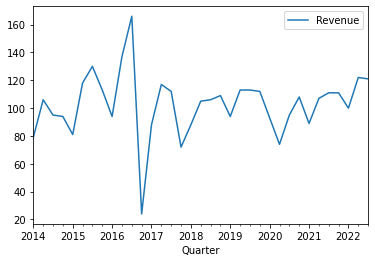

In [48]:
df.plot()

In [49]:
train = df[0:27]
test = df[27:]

8.9095562096062


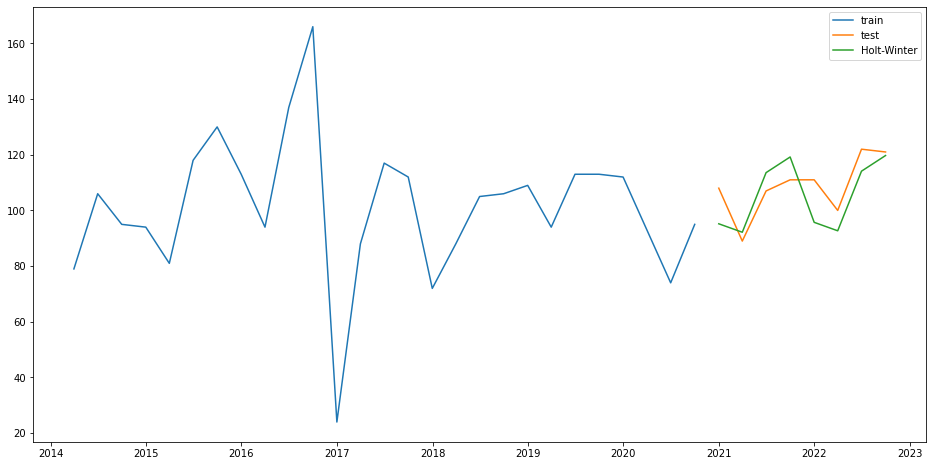

In [50]:
y_hat_avg = test.copy()
fit = ExponentialSmoothing(np.asarray(df['Revenue']),seasonal_periods=4,trend='add',seasonal='add').fit()
y_hat_avg['Holt-Winter'] = fit.forecast(len(test))
Q4_2022 = fit.forecast(1)
plt.figure(figsize=(16,8))
plt.plot(train['Revenue'],label='train')
plt.plot(test['Revenue'],label='test')
plt.plot(y_hat_avg['Holt-Winter'],label='Holt-Winter')
plt.legend(loc='best')
rms = sqrt(mean_squared_error(test['Revenue'],y_hat_avg['Holt-Winter']))
print(rms)

In [51]:
pred_2022 = round(int(y_hat_avg['Holt-Winter'][-3]+ \
             y_hat_avg['Holt-Winter'][-2]+y_hat_avg['Holt-Winter'][-1]+Q4_2022),0)

In [52]:
print(f"Total Revenue of TSQ in 2022 is around: {pred_2022} million")

Total Revenue of TSQ in 2022 is around: 421 million


In this forecasting case, I tried to use data from Yahoo Finance ar first, however, there is only open price, close price and volume. I don't think the revenue can
be clarified by those inidcator. Therefore, I directly use annual revenue data of TSQ throguh: https://www.macrotrends.net/stocks/charts/TSQ/townsquaremedia/revenue (https://www.macrotrends.net/stocks/charts/TSQ/townsquare-media/revenue). Based on this data, I also tried Simple Exponential Smoothing
and ARIMA, but those methods don't fit well. Compared to annual revenues, quarter revenues have clear pattern and enough data to seperate into train and
test sets.

# Classification

In [53]:
cv1 = pd.read_csv(r'carnival_visitors.csv')
cv1.head()

,householdID,est_inc_USD,est_netw_USD,hhold_field,hhold_oldest,hhold_pax,hhold_youngest,homeState,hhold_car,stream_subs,primary
0,23,59245,381931,Govt,48,2,8,New York,SUV,2,0
1,27,116628,457159,Tech,51,5,21,New Hampshire,SUV,3,1
2,36,65835,394803,Services,50,4,13,Vermont,Pickup,3,0
3,41,132483,429296,Tech,54,2,11,Massachusetts,SUV,3,1
4,44,83444,488210,Education,51,7,12,Maine,SUV,3,0


## Identify the categorical and numerical variables

In [54]:
cv1.dtypes

householdID        int64
est_inc_USD        int64
est_netw_USD       int64
hhold_field       object
hhold_oldest       int64
hhold_pax          int64
hhold_youngest     int64
homeState         object
hhold_car         object
stream_subs        int64
primary            int64
dtype: object

In [55]:
cv1['primary'].value_counts()

primary
1    8124
0    6876
Name: count, dtype: int64

## Dealing with missing values

In [56]:
cv1 = cv1.dropna()

In [57]:
cv1.isnull().sum()

householdID       0
est_inc_USD       0
est_netw_USD      0
hhold_field       0
hhold_oldest      0
hhold_pax         0
hhold_youngest    0
homeState         0
hhold_car         0
stream_subs       0
primary           0
dtype: int64

## Dummifying

In [58]:
cv1.columns

Index(['householdID', 'est_inc_USD', 'est_netw_USD', 'hhold_field',
       'hhold_oldest', 'hhold_pax', 'hhold_youngest', 'homeState', 'hhold_car',
       'stream_subs', 'primary'],
      dtype='object')

In [59]:
cv1 = pd.get_dummies(cv1, drop_first=True, columns=['hhold_field','homeState','hhold_car']).astype(int)

In [60]:
cv1.columns

Index(['householdID', 'est_inc_USD', 'est_netw_USD', 'hhold_oldest',
       'hhold_pax', 'hhold_youngest', 'stream_subs', 'primary',
       'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing',
       'hhold_field_Other', 'hhold_field_Services', 'hhold_field_Tech',
       'homeState_Connecticut', 'homeState_Maine', 'homeState_Massachusetts',
       'homeState_New Hampshire', 'homeState_New York', 'homeState_Ontario',
       'homeState_Quebec', 'homeState_Rhode Island', 'homeState_US_Other',
       'homeState_Vermont', 'hhold_car_LuxurySedan', 'hhold_car_Pickup',
       'hhold_car_SUV', 'hhold_car_Sedan'],
      dtype='object')

In [61]:
X=cv1[['est_inc_USD', 'est_netw_USD', 'hhold_oldest',
 'hhold_pax', 'hhold_youngest', 'stream_subs', 
 'hhold_field_Finance', 'hhold_field_Govt', 'hhold_field_Manufacturing',
 'hhold_field_Other', 'hhold_field_Services', 'hhold_field_Tech',
 'homeState_Ontario',
 'homeState_Quebec', 'homeState_US_Other',
 'homeState_Vermont', 'hhold_car_LuxurySedan', 'hhold_car_Pickup',
 'hhold_car_SUV', 'hhold_car_Sedan']]
y=cv1['primary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=24)

In [62]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train)).fit()
log_reg = sm.Logit(y_test, sm.add_constant(X_test)).fit()

Optimization terminated successfully.
         Current function value: 0.612681
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.609360
         Iterations 5


In [63]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                primary   No. Observations:                 5780
Model:                          Logit   Df Residuals:                     5759
Method:                           MLE   Df Model:                           20
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.1154
Time:                        11:13:56   Log-Likelihood:                -3522.1
converged:                       True   LL-Null:                       -3981.5
Covariance Type:            nonrobust   LLR p-value:                7.820e-182
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.4785      0.387     11.585      0.000       3.721       5.236
est_inc_USD               -9.601e-06   1.69e-06     -5.665      0.000   -1.29e-05   -6.28e-06
est_netw_USD               2.236e-06   5.56e-07      4.020      0.000    1.15e-06    3.33e-06
hhold_oldest                 -0.1094      0.006    -17.784      0.000      -0.121      -0.097
hhold_pax                     0.0489      0.018      2.712      0.007       0.014       0.084
hhold_youngest               -0.0072      0.004     -1.851      0.064      -0.015       0.000
stream_subs                   0.2429      0.017     14.252      0.000       0.209       0.276
hhold_field_Finance          -0.8389      0.114     -7.380      0.000      -1.062      -0.616
hhold_field_Govt             -1.0127      0.099    -10.231      0.000      -1.207      -0.819
hhold_field_Manufacturing    -0.2369      0.191     -1.240      0.215      -0.611       0.137
hhold_field_Other            -0.4296      0.188     -2.283      0.022      -0.798      -0.061
hhold_field_Services          0.2013      0.114      1.771      0.077      -0.021       0.424
hhold_field_Tech             -0.5273      0.115     -4.575      0.000      -0.753      -0.301
homeState_Ontario            -0.1264      0.129     -0.977      0.329      -0.380       0.127
homeState_Quebec              0.0086      0.122      0.071      0.944      -0.230       0.247
homeState_US_Other           -0.1840      0.147     -1.249      0.212      -0.473       0.105
homeState_Vermont             0.0418      0.098      0.425      0.671      -0.151       0.235
hhold_car_LuxurySedan         0.2381      0.115      2.074      0.038       0.013       0.463
hhold_car_Pickup             -0.1644      0.132     -1.244      0.214      -0.424       0.095
hhold_car_SUV                -0.0389      0.108     -0.359      0.720      -0.251       0.174
hhold_car_Sedan               0.1104      0.117      0.941      0.347      -0.120       0.340
=============================================================================================
"""

After building the model the above summary indicates some high p-value of some the variable in which the homestate_quebec have maximum p-value which
can brings lots of reson behind this but the most impactable is the different country as it's hard to travel all the way from canada or the time, fuel, resorces
would be extra as compared to people live nearby and finally it does not give much statistical significance to the model.


## Predicting the model

In [64]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test) 
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

0.5271626297577855
[[1177 1445]
 [1288 1870]]
              precision    recall  f1-score   support

           0       0.48      0.45      0.46      2622
           1       0.56      0.59      0.58      3158

    accuracy                           0.53      5780
   macro avg       0.52      0.52      0.52      5780
weighted avg       0.52      0.53      0.53      5780



In this model we can identify that the accuracy score is 53% and sensitivity rate is 59% with the specificity rate is 45% through which we can conclude that
the balanced accuracy of the model is sensitivity+specificity/2 which would be 52%.

### Predicting the model through decision tree classification

In [66]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test) 
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions)) 
print(classification_report(y_test, predictions))

0.6252595155709343
[[1575 1047]
 [1119 2039]]
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      2622
           1       0.66      0.65      0.65      3158

    accuracy                           0.63      5780
   macro avg       0.62      0.62      0.62      5780
weighted avg       0.63      0.63      0.63      5780



We have predicted the model again with decision tree classifier as it works for both continuous as well as categorical output variables and also this suggest
our team to determine the potential and primary purpose of the visitors to visit in winter carnival for either consume or entertain purpose and in this model we
can identify that the accuracy score is 62% and sensitivity rate is 64% with the specificity rate is 59% through which we can conclude that the balanced
accuracy of the model is sensitivity+specificity/2 which would be 62%.

### Accuracy of train and test set

In [67]:
y_predict = classifier.predict(X_test)
logmodel = LogisticRegression(max_iter=500)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [68]:
predictions = logmodel.predict(X_test)
accuracy_score(y_test, predictions)

0.586159169550173

In [69]:
predictions = logmodel.predict(X_train)
print(metrics.accuracy_score(y_train,predictions))

0.573537893644019


In this section we can observe that the accuracy score of testing set is 0.5862 and on other hand the accracy score of training set is 0.5735.

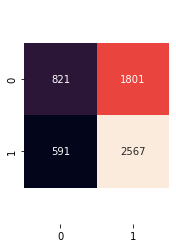

In [70]:
%matplotlib inline
predictions = logmodel.predict(X_test)
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat, fmt='g', square=True, annot=True, cbar=False)
a, b = plt.ylim() 
a += 0.5
b -= 0.5
plt.ylim(a, b)
plt.show()

The number 821 corresponds to the number of visitors who were correctly predicted by the model who visit the winter carnival with
mood of consuming the food and drinks and enjoy the evening , meaning they will contribute more towards carnival merchandise and snack stores that can
generate stronger revenue model 

The number 2567 corresponds to the number of visitors that the model correctly predicted to visit the winter carnival with
entertain purpose and experience the amazing live performance, comedy shows and competitions that will create thrill and excitement among the visitors and
probably they'll refer and recommend theirs friends and neighbours to visit the winter carnival that will also simultaneously increase the visitors traffic and profit
margin of the park. 

The analysis of the confusion matrix model and the p-values for all variables suggests that visitors are more inclined to attend the winter carnival for entertainment purposes. They value the experience of witnessing thrilling competitions and live performances, cherishing memorable moments. Additionally, there's room for improvement in the food section. Introducing attractive discount offers and bundle deals could enhance the overall visitor experience and encourage them to spend more at the park.

While these are key findings, there could be other factors influencing visits. Some individuals might be nearby residents seeking a break from screens, while others might be lured by one-day pass promotions. In essence, the winter carnival caters to various customer segments. The main focus is to boost the park's popularity and revenue model, acknowledging different visitor priorities and preferences.


# A/B Testing


In [71]:
sp = pd.read_csv(r'snowmobile_pics.csv')
sp.head()

,recipient,pic_seen,site_duration,spend,register
0,1,Racers in Action,18.20,16.60,0
1,2,Starting Line,28.61,15.30,0
2,3,Sharp Turn,10.90,16.32,1
3,4,Sharp Turn,11.30,22.62,0
4,5,Racers in Action,19.70,17.30,0


In [72]:
sp.groupby('pic_seen').mean()

,recipient,site_duration,spend,register
pic_seen,,,,
Racers in Action,1693.945946,22.949189,16.781892,0.440541
Sharp Turn,1734.473730,10.975394,18.606778,0.348511
Starting Line,1673.040941,24.294059,14.016289,0.341463


Set alpha threshhold to be .05 for all comparisons.


## Situation I
lobster Land prioritizing the kpi "register"

### i. Pic: Racers in Action vs. Pic: Sharp Turn
        
The null hypothesis H0 is that Pic: Racers in Action and Pic: Sharp Turn are equally effective at "register".

In [73]:
group_a = sp.loc[sp['pic_seen'] == 'Racers in Action', 'register'].values
group_b = sp.loc[sp['pic_seen'] == 'Sharp Turn', 'register'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to 4.48659813805182, p-value is equal to 7.6013670601284866e-06


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Racers in Action and Pic: Sharp Turn are equally effective at "register".
Furthermore, 44.05% recipients who received "Racers in Action" registered but only 34.85% recipents who received "Sharp Turn" registered.
Therefore, we can conclude that "Racers in Action" is more effective than "Sharp Turn" at the kpi "register".

### ii. Pic: Racers in Action vs. Pic: Starting Line

The null hypothesis H0 is that Pic: Racers in Action and Pic: Starting Line are equally effective at "register".

In [74]:
group_a = sp.loc[sp['pic_seen'] == 'Racers in Action', 'register'].values
group_b = sp.loc[sp['pic_seen'] == 'Starting Line', 'register'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to 4.8480946527362345, p-value is equal to 1.331438616096751e-06


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Racers in Action and Pic: Starting are equally effective at "register".
Furthermore, 44.05% recipients who received "Racers in Action" registered but only 34.15% recipents who received "Starting Line" registered.
Therefore, we can conclude that "Racers in Action" is more effective than "Starting Line" at the kpi "register".


### iii. Pic: Sharp Turn vs. Pic: Starting Line
        
The null hypothesis H0 is that Pic: Sharp Turn and Pic: Starting Line are equally effective at "register".


In [75]:
group_a = sp.loc[sp['pic_seen'] == 'Sharp Turn', 'register'].values
group_b = sp.loc[sp['pic_seen'] == 'Starting Line', 'register'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to 0.35460817550947715, p-value is equal to 0.7229158305143963


Since the p-value for our t-test is more than .05, we fail to reject the null hypothesis that Pic: Sharp Turn and Pic: Starting are equally effective at "register".
Furthermore, 34.85% recipients who received "Sharp Turn" registered and 34.15% recipents who received "Starting Line" registered. These two
percentages are indeed pretty close.
Therefore, we can conclude that Pic: Sharp Turn and Pic: Starting Line are equally effective at the kpi "register".
In summary, for the kpi "register", "Racers in Action" > "Sharp Turn" = "Starting Line"

## Situation II
Lobster Land prioritizing the kpi site_duration

### i. Pic: Racers in Action vs. Pic: Sharp Turn
        
The null hypothesis H0 is that Pic: Racers in Action and Pic: Sharp Turn are equally effective at "site_duration".


In [76]:
group_a = sp.loc[sp['pic_seen'] == 'Racers in Action', 'site_duration'].values
group_b = sp.loc[sp['pic_seen'] == 'Sharp Turn', 'site_duration'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to 180.71977956194002, p-value is equal to 0.0


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Racers in Action and Pic: Sharp Turn are equally effective at
"site_duration".
Also, since the mean of site_duration for Racers in Action is 22.95 and the mean of site_duration for Sharp Turn is 10.98, we can conclude that Racers in
Action is more effective than Sharp Turn at site_duration.

### ii. Pic: Racers in Action vs. Pic: Starting Line

The null hypothesis H0 is that Pic: Racers in Action and Pic: Starting Line are equally effective at "site_duration".


In [77]:
group_a = sp.loc[sp['pic_seen'] == 'Racers in Action', 'site_duration'].values
group_b = sp.loc[sp['pic_seen'] == 'Starting Line', 'site_duration'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to -9.911415184705456, p-value is equal to 1.0724418388111107e-22


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Racers in Action and Pic: Starting Line are equally effective at
"site_duration".
Also, since the mean of site_duration for Racers in Action is 22.95 and the mean of site_duration for Starting Line is 24.29, we can conclude that Racers in
Action is less effective than Starting Line at site_duration.

### iii. Pic: Sharp Turn vs. Pic: Starting Line

The null hypothesis H0 is that Pic: Sharp Turn and Pic: Starting Line are equally effective at "site_duration"

In [78]:
group_a = sp.loc[sp['pic_seen'] == 'Sharp Turn', 'site_duration'].values
group_b = sp.loc[sp['pic_seen'] == 'Starting Line', 'site_duration'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to -112.12607762440105, p-value is equal to 0.0


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Sharp Turn and Pic: Starting Line are equally effective at "site_duration".
Also, since the mean of site_duration for Sharp Turn is 10.98 and the mean of site_duration for Starting Line is 24.29, we can conclude that Sharp Turn is less
effective than Starting Line at site_duration.

In summary, for the kpi site_duration, Starting Line > Racers in Action > Sharp Turn

## Situation III
Lobster Land prioritizing the kpi "spend"

### i. Pic: Racers in Action vs. Pic: Sharp Turn

The null hypothesis H0 is that Pic: Racers in Action and Pic: Sharp Turn are equally effective at "spend"

In [79]:
group_a = sp.loc[sp['pic_seen'] == 'Racers in Action', 'spend'].values
group_b = sp.loc[sp['pic_seen'] == 'Sharp Turn', 'spend'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to -23.596074151014385, p-value is equal to 3.5328205740249146e-110


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Racers in Action and Pic: Sharp Turn are equally effective at "spend".
Also, since the mean of spend for Racers in Action is 16.78 and the mean of spend for Sharp Turn is 18.61, we can conclude that Racers in Action is less
effective than Sharp Turn at spend.

### ii. Pic: Racers in Action vs. Pic: Starting Line

The null hypothesis H0 is that Pic: Racers in Action and Pic: Starting Line are equally effective at "spend".

In [80]:
group_a = sp.loc[sp['pic_seen'] == 'Racers in Action', 'spend'].values
group_b = sp.loc[sp['pic_seen'] == 'Starting Line', 'spend'].values

t_statistic, p_value = stats.ttest_ind(group_a, group_b)
print(f't-value is equal to {t_statistic}, p-value is equal to {p_value}')

t-value is equal to 40.53370629078891, p-value is equal to 2.4333914152341534e-270


Since the p-value for our t-test is less than .05, we reject the null hypothesis that Pic: Racers in Action and Pic: Starting Line are equally effective at "spend".
Also, since the mean of spend for Racers in Action is 16.78 and the mean of spend for Starting Line is 14.02, we can conclude that Racers in Action is more
effective than Starting Line at spend.

In summary, for the kpi "spend", we have Sharp Turn > Racers in Action > Starting Line


## Putting every kpi comparison together, we have:
    
### For the kpi register: Racers in Action > Sharp Turn = Starting Line
### For the kpi site_duration: Starting Line > Racers in Action > Sharp Turn
### For the kpi spend: we have Sharp Turn > Racers in Action > Starting Line

### Recommendation to Lobster Land

If Lobster Land can prioritize a specific kpi, it be be easier for it to choose what picture to use based on above summary.However, if Lobster Land has to choose a pic to use without targetting a specific kpi, I'd recommendation it to choose "Racers in Action" as "Racers in Action"
performs the best in general.